In [1]:
# Install LangChain - A framework for developing applications powered by language models
!pip install langchain

# Install LangChain integration for Google Generative AI - Allows using Google's Gemini model with LangChain
!pip install langchain-google-genai

# Install Google Generative AI client - Needed to access Google's generative AI models
!pip install google-generativeai

# Install SerpAPI - Used for real-time Google Search queries within the app
!pip install google-search-results



In [2]:
# Install LangChain Community Edition - Contains community-contributed tools and integrations for LangChain
!pip install langchain-community

# Install LangChain integration for Google Generative AI - Allows using Google's Gemini model with LangChain
!pip install langchain-google-genai

# Install Streamlit - A web framework for building interactive data apps and dashboards
!pip install streamlit

# Install Pyngrok (with quiet mode) - Used to create public URLs for the Streamlit app in Colab
!pip -q install pyngrok



# **Get Gemini API key**

In [3]:
from google.colab import userdata  # Import module to access user-specific data in Colab
gemini_key = userdata.get('gemini_key')  # Retrieve the stored gemini_key securely

import os  # Import os module to interact with the operating system
os.environ["GOOGLE_API_KEY"] = gemini_key  # Set the gemini_key as an environment variable



# **# GET SERP API Key**


https://serpapi.com/

- perform email verification

- perform mobile verification

- subscribe free plan


https://serpapi.com/dashboard

In [4]:
from google.colab import userdata  # Import module to access user-specific data in Colab
serpi_key = userdata.get('serpi_key')  # Retrieve the stored serpi_key securely
os.environ["SERPAPI_API_KEY"] = serpi_key  # Set the serpi_key as an environment variable




In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI  # Import Gemini model from LangChain
from langchain.agents import initialize_agent, AgentType  # Import agent initialization tools
from langchain.tools import Tool  # Import Tool class for creating custom tools
from langchain.utilities import GoogleSearchAPIWrapper  # Import Google Search utility (optional)
from langchain.utilities import SerpAPIWrapper  # Import SerpAPI utility for web search

# Initialize Gemini model with specific parameters
gemini_llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.7)

# Set up SerpAPI key as an environment variable
os.environ["SERPAPI_API_KEY"] = serpi_key

# Initialize SerpAPI search tool
search = SerpAPIWrapper()  # Create an instance of SerpAPIWrapper for real-time search
search_tool = Tool(
    name="Google Search",  # Name of the tool
    func=search.run,  # Function to execute the search
    description="Use this tool to search the internet for real-time information."
)

# Define the agent with tools and Gemini model
agent = initialize_agent(
    tools=[search_tool],  # List of tools the agent can use
    llm=gemini_llm,  # Language model for generating responses
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # Agent type for zero-shot learning
    verbose=True  # Enable detailed logging of the agent's actions
)

# Ask the agent a query and print the response
query = "What is the stock price of MRF IN BSE AND NSE"  # The question to ask
response = agent.run(query)  # Get the agent's response
print(response)  # Output the response


<ipython-input-5-d17847c0c53a>:22: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(
<ipython-input-5-d17847c0c53a>:31: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = agent.run(query)  # Get the agent's response




> Entering new AgentExecutor chain...
Action: Google Search
Action Input: What is the stock price of MRF IN BSE AND NSE


Observation: {'type': 'finance_results', 'title': 'MRF Ltd', 'exchange': 'BOM', 'stock': ' 500290', 'currency': 'INR', 'price': 109330.65, 'previous_close': 109915.85}
Thought:Final Answer: 109330.65

> Finished chain.
109330.65


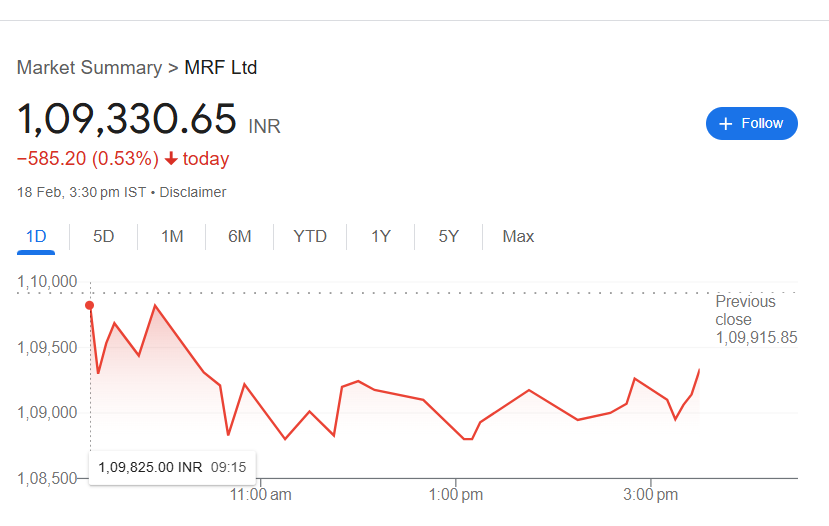

✅ Agents dynamically search the web—unlike a standard LLM , which relies on pre-existing knowledge.

✅ The right search query matters—small changes in phrasing can make a big difference in accuracy.

✅ SerpAPI is a great alternative when Google Custom Search API has restrictions